In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('new-plant-diseases-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_90deg.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_new30degFlipLR.JPG
new-plant-diseases-dataset\New Plant Disea

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Squash___Powdery_mildew\007f0b62-a0f0-4c4a-9b1b-119616dd87c2___UMD_Powd.M 0279.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Squash___Powdery_mildew\00a90bbc-a12c-426d-bcc8-fadb371ea6d0___UMD_Powd.M 0358.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Squash___Powdery_mildew\01f35103-b63d-4bbd-a97c-8df9c2460a21___MD_Powd.M 0842_flipLR.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Squash___Powdery_mildew\03ef962a-db63-4e3c-8f50-8bc174946f44___UMD_Powd.M 0613_flipLR.JPG
new-plant-diseases-dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Squash___Powdery_mildew\04635a46-8018-42c6-aa66-d3ad9b4d37a5___UMD_Powd.M 0188.JPG
new-plant-diseases-dataset\

In [3]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import tensorflow_hub as hub

In [4]:
data_directory = pathlib.Path("new-plant-diseases-dataset")
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['.ipynb_checkpoints', 'New Plant Diseases Dataset(Augmented)', 'test']


In [5]:
data_directory = pathlib.Path("new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)")
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['New Plant Diseases Dataset(Augmented)']


In [6]:
data_directory = pathlib.Path("new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)")
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['train', 'valid']


# Training Image preprocessing

In [7]:
# Define the full path to the 'train' directory
train_directory = "new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# Create the image dataset from the directory
training_set = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


# Validation Image Preprocessing

In [8]:
# Define the full path to the 'valid' directory
valid_directory = "new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Create the image dataset from the directory
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Building Model

In [9]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

# Compiling and training phase

In [20]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [22]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=2)

Epoch 1/2
2197/2197 [==============================] - 3629s 2s/step - loss: 1.3224 - accuracy: 0.6102 - val_loss: 0.4522 - val_accuracy: 0.8581
Epoch 2/2
2197/2197 [==============================] - 3791s 2s/step - loss: 0.4146 - accuracy: 0.8676 - val_loss: 0.2698 - val_accuracy: 0.9146


# Evaluating Model

In [23]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 747s 340ms/step - loss: 0.2092 - accuracy: 0.9330
Training accuracy: 0.9329681992530823


In [24]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 177s 321ms/step - loss: 0.2698 - accuracy: 0.9146
Validation accuracy: 0.9146369099617004


# Saving Model

In [54]:
cnn.save('trained_model.keras')

In [36]:
training_history.history #Return Dictionary of history

{'loss': [1.3223730325698853, 0.41458460688591003],
 'accuracy': [0.610214114189148, 0.8676007986068726],
 'val_loss': [0.4522307217121124, 0.26976829767227173],
 'val_accuracy': [0.8581265807151794, 0.9146369099617004]}

In [31]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [37]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

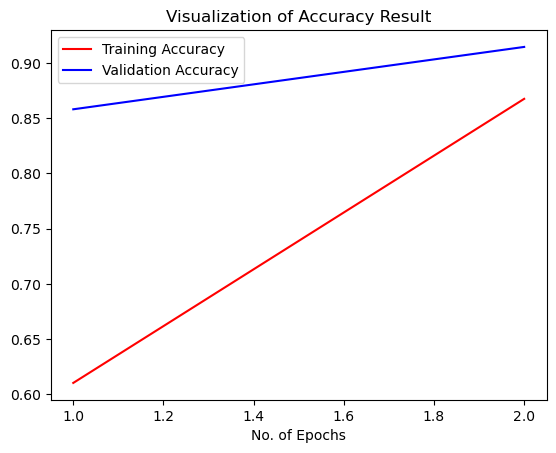

In [43]:
epochs = [i for i in range(1,3)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [44]:
class_name = validation_set.class_names

In [45]:
# Define the full path to the 'test' directory
test_directory = "new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Create the image dataset from the directory
test_set = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,  # Set batch_size to 1 for individual image processing
    image_size=(128, 128),
    shuffle=False,  # Set shuffle to False for the test set
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [42]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 340s 19ms/step


In [46]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [47]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [48]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [50]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.86      0.89       504
                                 Apple___Black_rot       0.99      0.84      0.91       497
                          Apple___Cedar_apple_rust       0.95      0.93      0.94       440
                                   Apple___healthy       0.96      0.75      0.84       502
                               Blueberry___healthy       0.86      0.96      0.91       454
          Cherry_(including_sour)___Powdery_mildew       0.92      0.95      0.93       421
                 Cherry_(including_sour)___healthy       0.95      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.81      0.87       410
                       Corn_(maize)___Common_rust_       0.95      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.97      0.

# Confusion Matrix Visualization


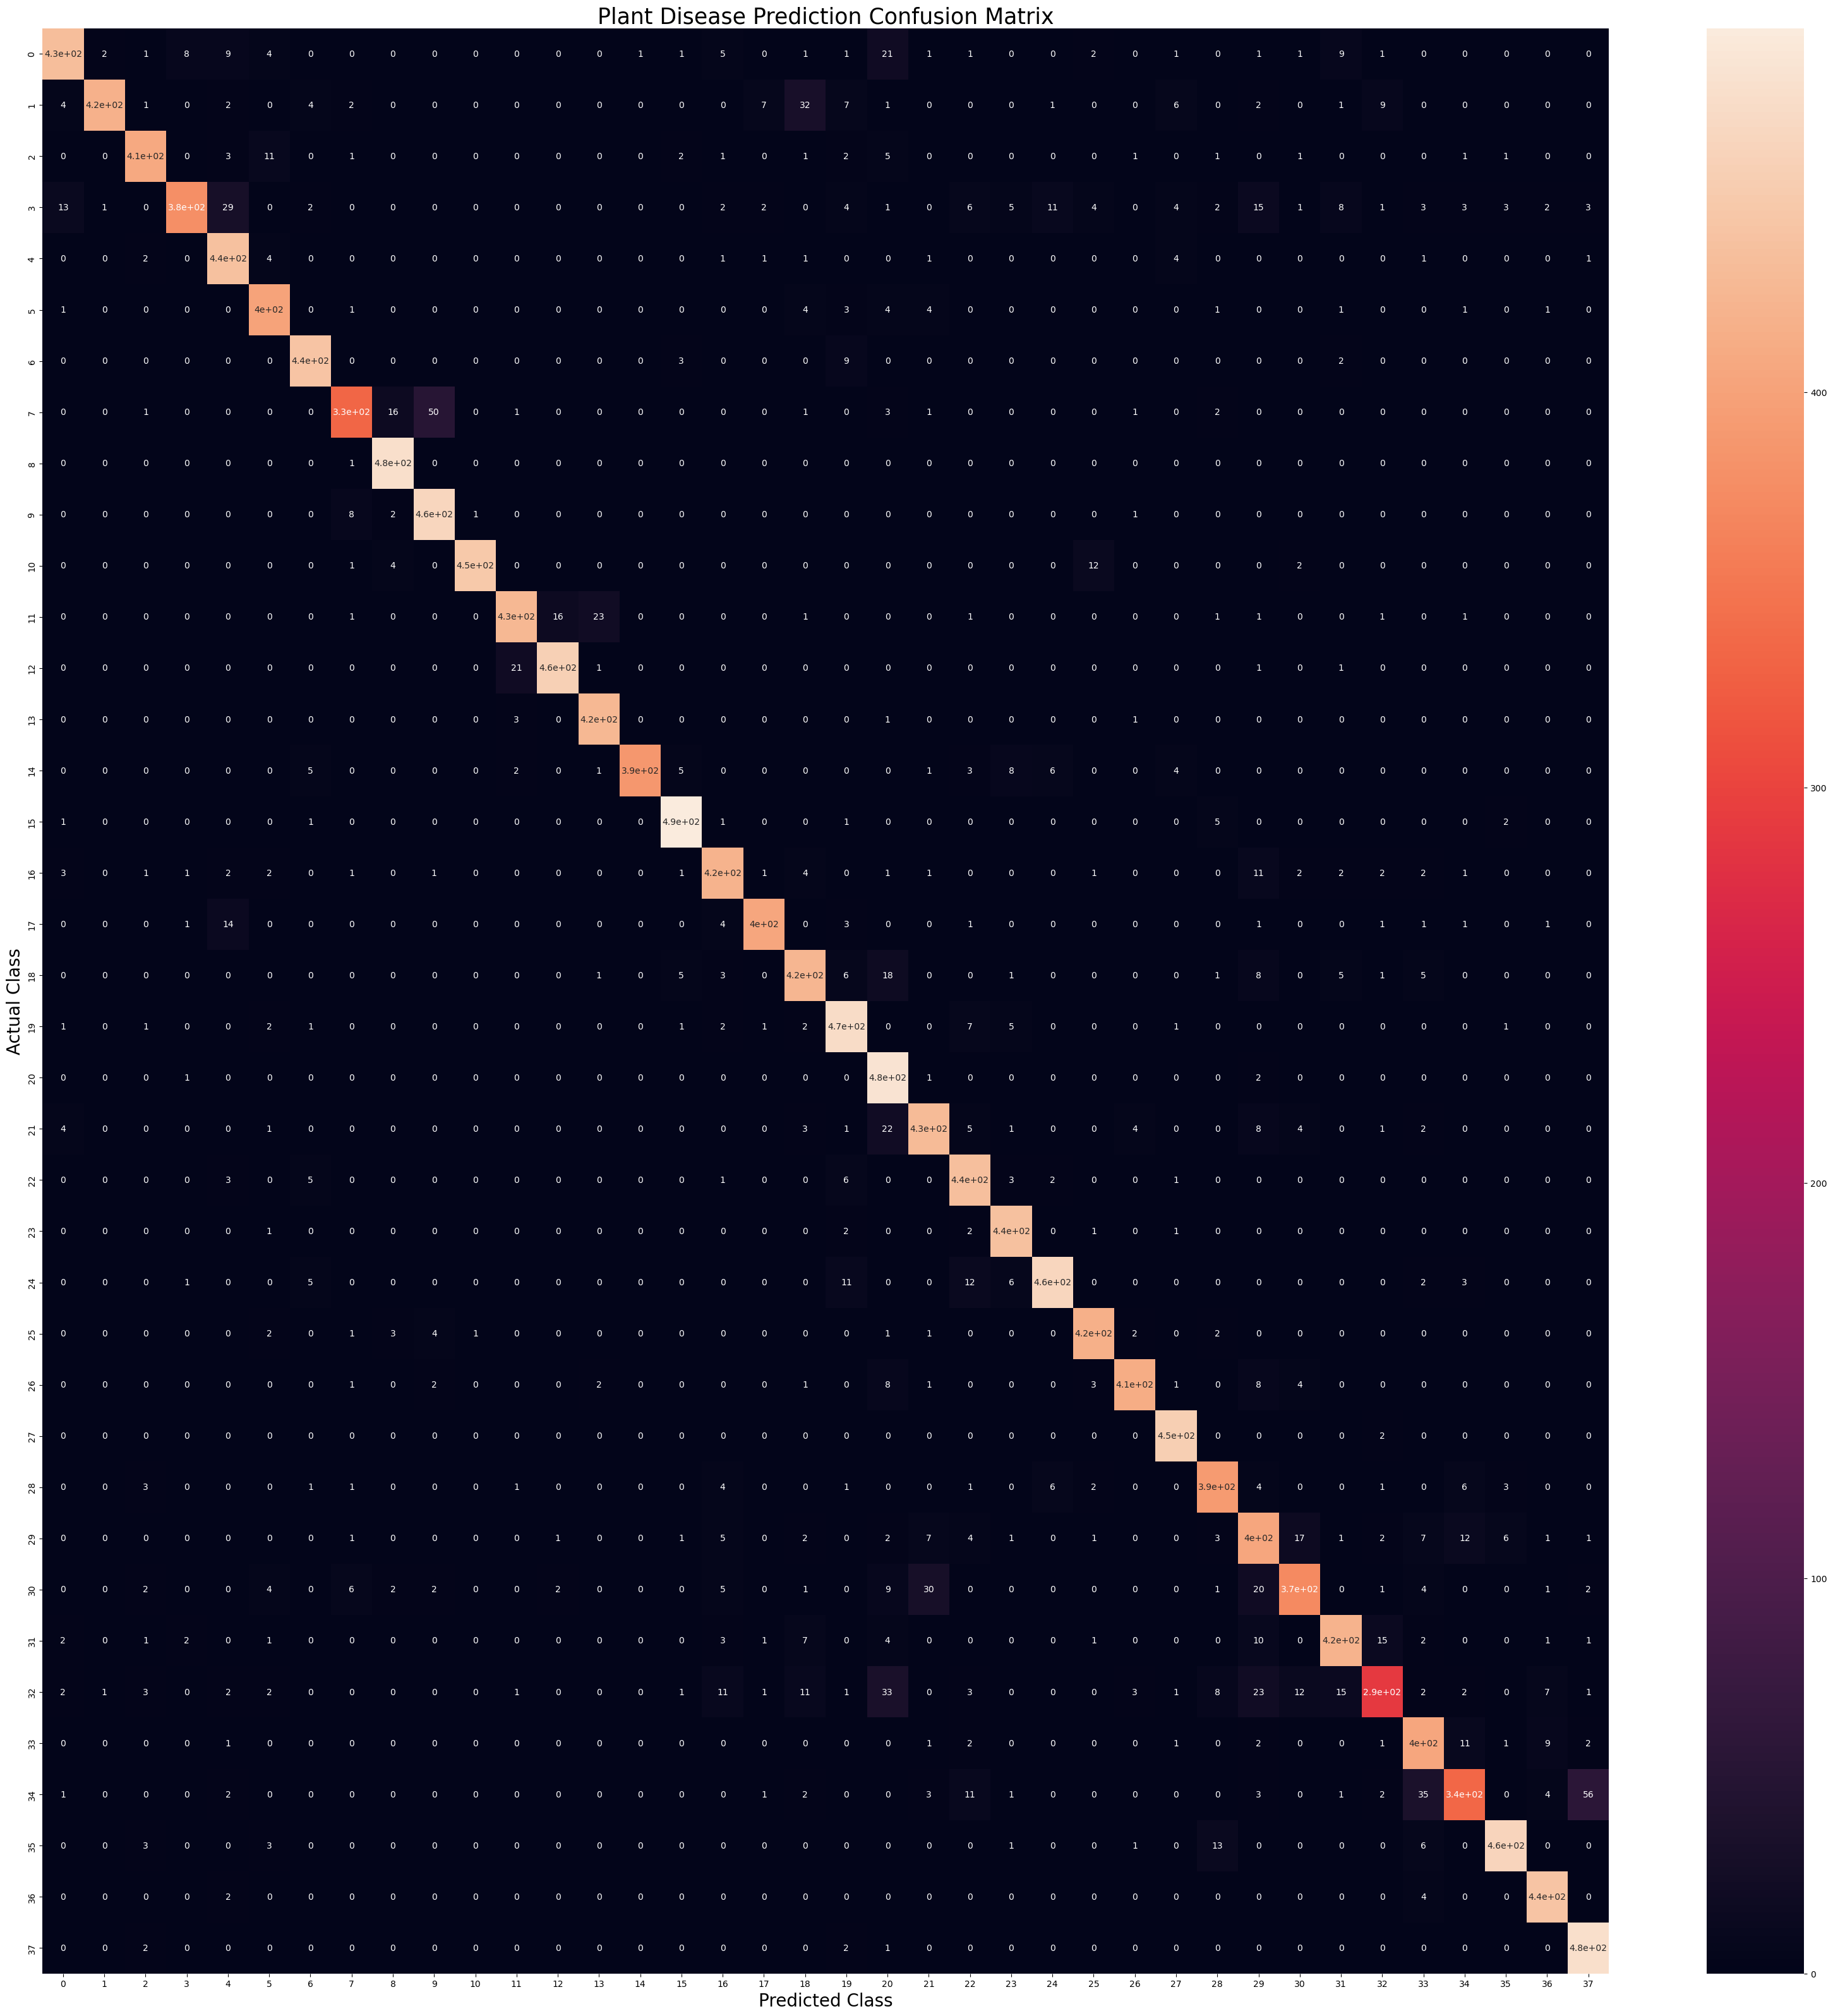

In [52]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Test set Image Processing

In [53]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw